# Project 1: Developing a FLINT Forest Monitoring tool using Land Sector datasets

## Task:
[Week 1 Instructions](https://github.com/moja-global/mentorship/blob/main/outreachy/2024/May-cohort/Task_1.md)

[Week 2 Instructions](https://github.com/moja-global/mentorship/blob/main/outreachy/2024/May-cohort/Task_2.md)

## The dataset
[Dataset on Google Drive](https://drive.google.com/drive/folders/1GFyPHdV3IhL0qOmt9pwAckvyE4WUxEfD)

## Land sector repository
[Land Sector Datasets on GitHub](https://github.com/moja-global/Land_Sector_Datasets)

## Week 1 Task: 
Find an appropriate forest dataset and propose a location of interest (pick a forest you like!). Find another datasets of interest and document a workflow to extract and summarise forest squares in your location.

In [30]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 42.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 69.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 53.4 MB/s eta 0:00:00:00:01


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Read the JSON file into a DataFrame
# My interest is Mexico and Thailand.
df_mex = pd.read_json('MEX_Mexico_SDPT.json')
df_tha = pd.read_json('THA_Thailand_SDPT.json')

In [3]:
# read file json and geojson
def get_df(link):
    try:
        return gpd.read_file(link)
    except Exception as e:
        print(f"Error: {e}")
        try:
            # Retrieve data from the URL
            req = requests.get(link).content
            # Read the content as a GeoDataFrame
            return gpd.read_file(io.StringIO(req.decode('utf-8')))
        except Exception as e:
            print(f"An error was encouterted: {e}")
            return pd.DataFrame()

In [7]:
#get the json file 
mexico = get_df(r'MEX_Mexico_SDPT.json')
mexico_boundary = get_df(r'MEX_AL2_Mexico.json')

In [11]:
#change their crs to make sure having same bounds.
mexico = mexico.to_crs("EPSG:3857")
mexico_boundary = mexico_boundary.to_crs("EPSG:3857")

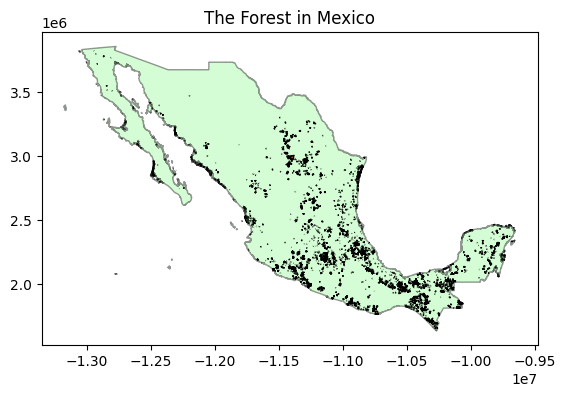

In [15]:
# the forest in mexico.
ax = mexico_boundary.plot(color="palegreen", edgecolor="black", alpha = 0.4)
mexico.plot(ax = ax, edgecolor='black', cmap='tab10', figsize=(20, 10))
plt.title("The Forest in Mexico")
plt.show()

## WorkFlow to extract and summarise forest squares

#### 1, Find the interesting location.
#### 2, Data Extraction:
Extract relevant data for the forest square, such as the climate, siol and ecological zones.
#### 3, Summarization and Analysis:
Calculate summary statistics for the forest square.
Analyze the spatial distribution and patterns of forest squares.
Identify any correlations or trends between forest square characteristics and external factors such as elevation, soil type, or proximity to human settlements.
#### 4, Visualization and Reporting:
Create visualizations to illustrate the findings of the analysis.
Prepare a report summarizing the key findings, methodology, and implications of the study.

# Week 2 task1:

## Generate a report from the Land Sector Datasets about Olympic National Park.
Olympic National Park is a United States national park located in the State of Washington, on the Olympic Peninsula. So we are going to extract the whshington data.

In [62]:
#get the washington ecological data.
washington_ecological=get_df(r"USA_AL4_Washington_GEZ.json")

In [63]:
washington_ecological

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,USA,US-WA,Washington,Temperate desert,34,TeBWk,4,"POLYGON ((240.34582 49.00011, 240.30941 49.000..."
1,USA,US-WA,Washington,Temperate mountain system,35,TeM,4,"MULTIPOLYGON (((237.14907 46.00174, 237.14375 ..."
2,USA,US-WA,Washington,Temperate oceanic forest,31,TeDo,4,"MULTIPOLYGON (((237.28436 47.09520, 237.28442 ..."


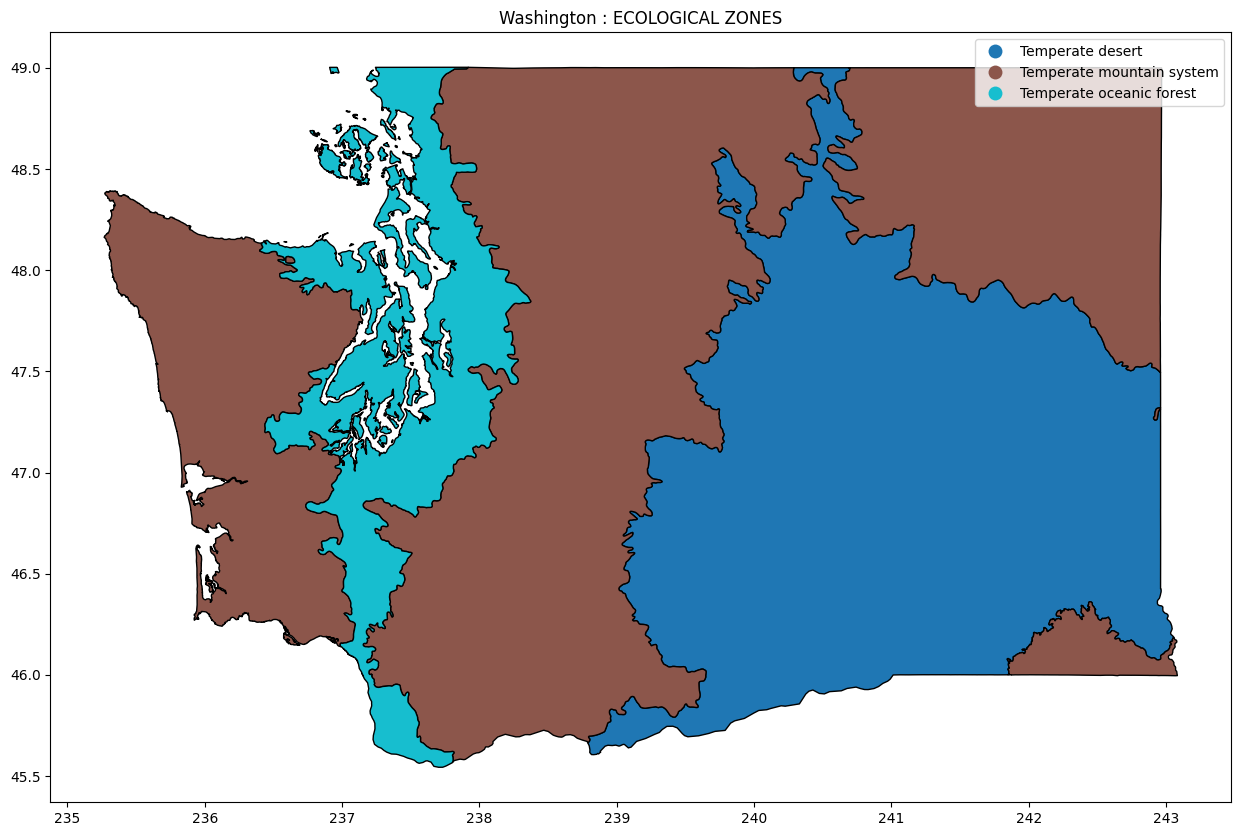

In [73]:
washington_ecological.plot(column='gez_name', edgecolor='black', cmap='tab10', figsize=(20, 10), legend=True)
plt.title("Washington : ECOLOGICAL ZONES")
plt.show()

In [36]:
#get the washington soil data 
washington_soil=get_df(r"USA_AL4_Washington_WSR.json")

In [37]:
washington_soil

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,USA,US-WA,Washington,AB,30,Albeluvisol,4,"POLYGON ((240.81680 49.00014, 240.80396 49.000..."
1,USA,US-WA,Washington,AN,4,Andosol,4,"MULTIPOLYGON (((235.99858 46.90678, 235.99927 ..."
2,USA,US-WA,Washington,CM,2,Cambisol,4,"MULTIPOLYGON (((236.59408 46.16736, 236.59408 ..."
3,USA,US-WA,Washington,KS,21,Kastanozem,4,"POLYGON ((243.06657 46.17384, 243.06310 46.176..."


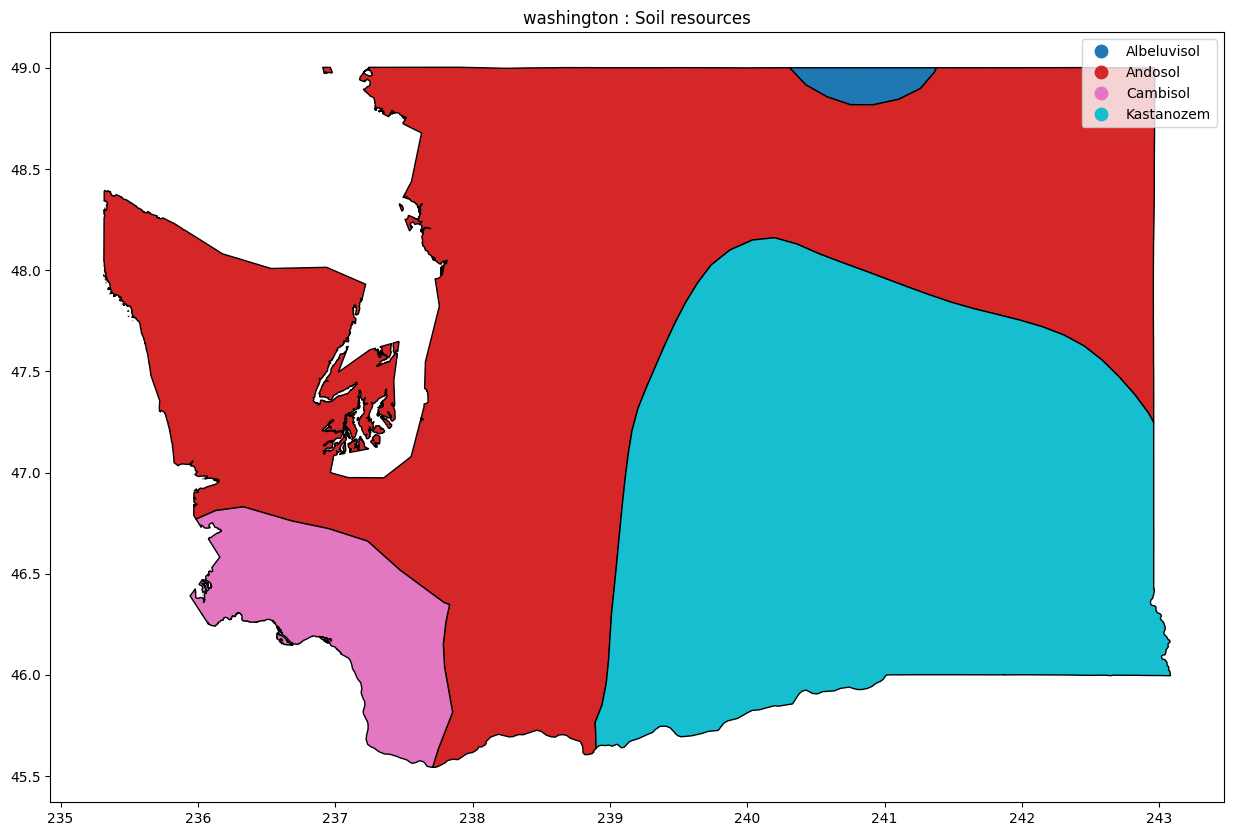

In [76]:

washington_soil.plot(column='IPCC', edgecolor='black', cmap='tab10', figsize=(20, 10), legend=True)
plt.title("washington : Soil resources")

plt.show()

In [83]:
# get the olympic national park data 
olympic_park=get_df(r"olympic-national-park.geojson")

In [84]:
olympic_park

,UNIT_TYPE,STATE,REGION,UNIT_CODE,UNIT_NAME,DATE_EDIT,GIS_NOTES,CREATED_BY,METADATA,PARKNAME,GNIS_ID,geometry
0,National Park,,PW,OLYM,Olympic,00000000,Shifted 0.06 - 0.07 miles,Legacy,,,,"POLYGON ((-124.06413 47.59871, -124.06406 47.5..."


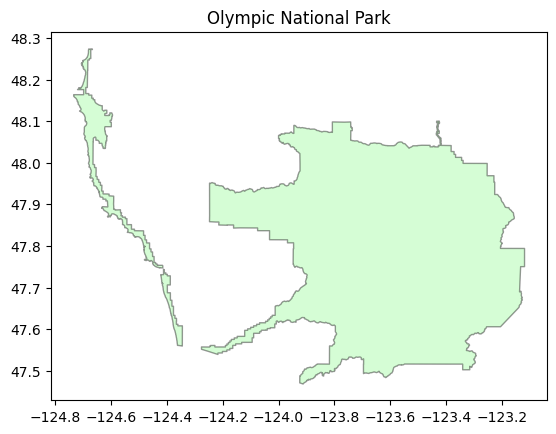

In [85]:
olympic_park.plot(color="palegreen", edgecolor="black", alpha = 0.4)
plt.title("Olympic National Park")
plt.show()

## Overlay Olympic National Park and Washington state.

In [120]:
# change their CRS to same one make sure the bounds are similar.
washington_ecological_1 = washington_ecological.to_crs("EPSG:3857")
olympic_park_1 = olympic_park.to_crs("EPSG:3857")
washington_soil_1 = washington_soil.to_crs("EPSG:3857")

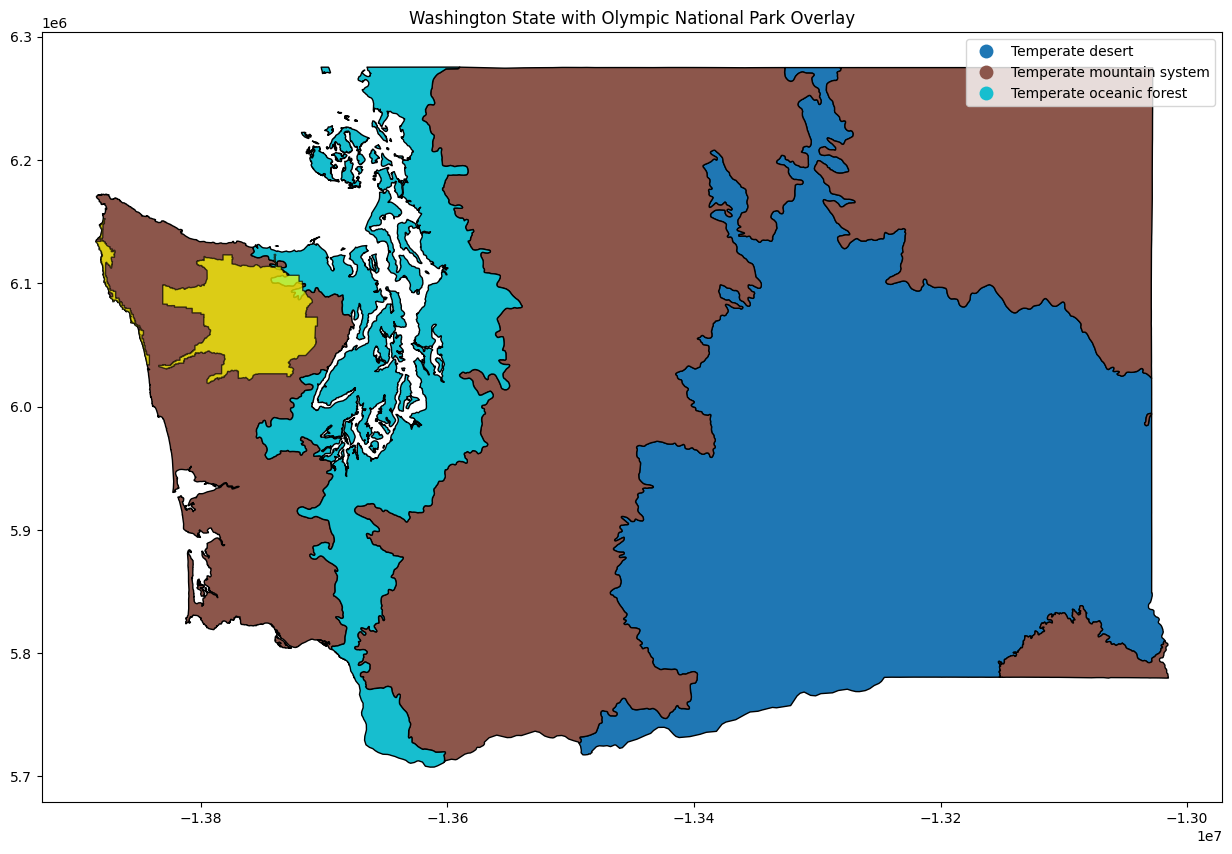

In [124]:
# Plot Washington State ecological zones
ax = washington_ecological_1.plot(column='gez_name', edgecolor='black', cmap='tab10', figsize=(20, 10), legend=True)
plt.title("Washington State with Olympic National Park Overlay")

# Overlay Olympic National Park on the same axes
olympic_park_1.plot(ax=ax, color="yellow", edgecolor="black", alpha=0.7)

# Show the plot
plt.show()


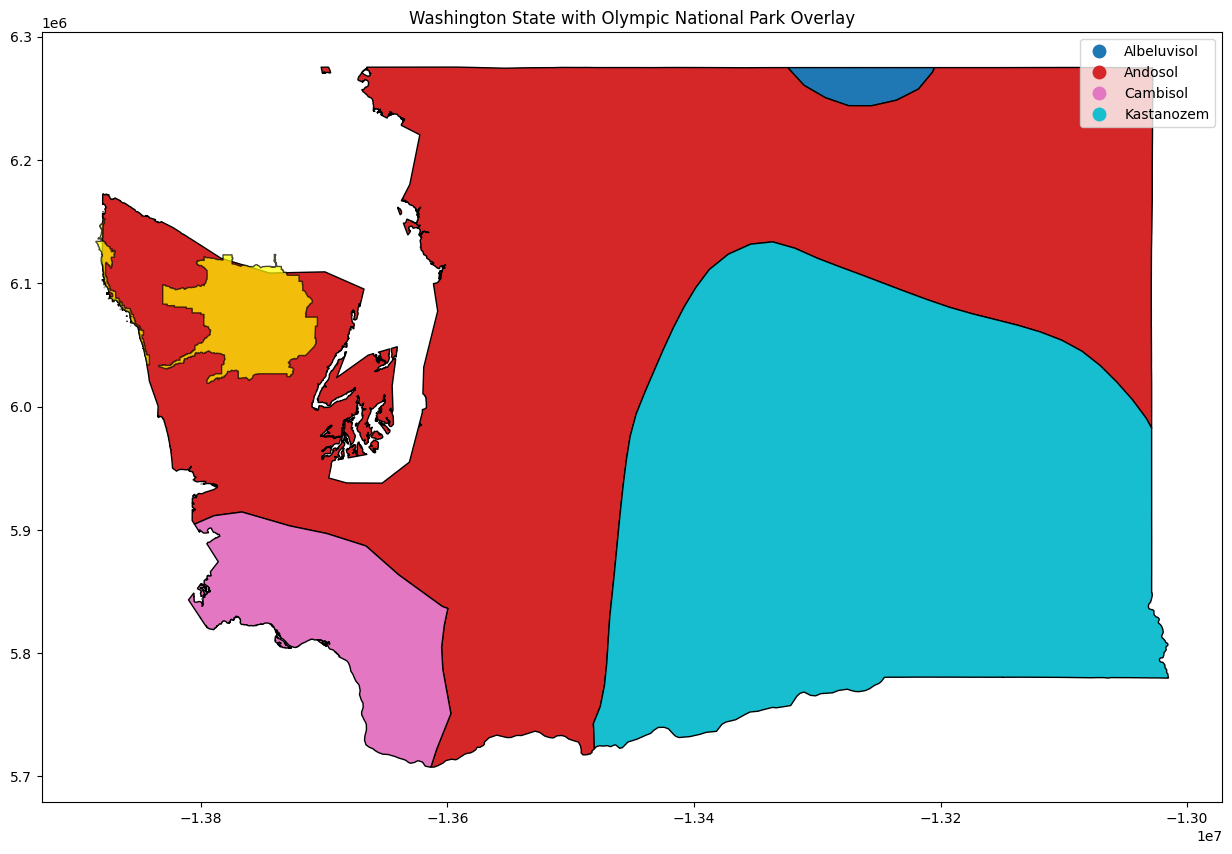

In [123]:
# Plot Washington State ecological zones
ax = washington_soil_1.plot(column='IPCC', edgecolor='black', cmap='tab10', figsize=(20, 10), legend=True)
plt.title("Washington State with Olympic National Park Overlay")

# Overlay Olympic National Park on the same axes
olympic_park_1.plot(ax=ax, color="yellow", edgecolor="black", alpha=0.7)

# Show the plot
plt.show()


### The climate of whole world

In [40]:
climate=get_df(r"IPCC_ClimateZoneMap_Vector.geojson")

In [41]:
climate

,CLASS_NAME,geometry
0,0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ..."
1,0,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ..."
2,0,"MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ..."
3,0,"MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ..."
4,5,"MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ..."
...,...,...
26160,1,"MULTIPOLYGON (((-26.35000 -58.40000, -26.35000..."
26161,1,"MULTIPOLYGON (((-26.65000 -59.00000, -26.65000..."
26162,1,"MULTIPOLYGON (((-27.40000 -59.40000, -27.40000..."
26163,1,"MULTIPOLYGON (((-27.25000 -59.40000, -27.25000..."


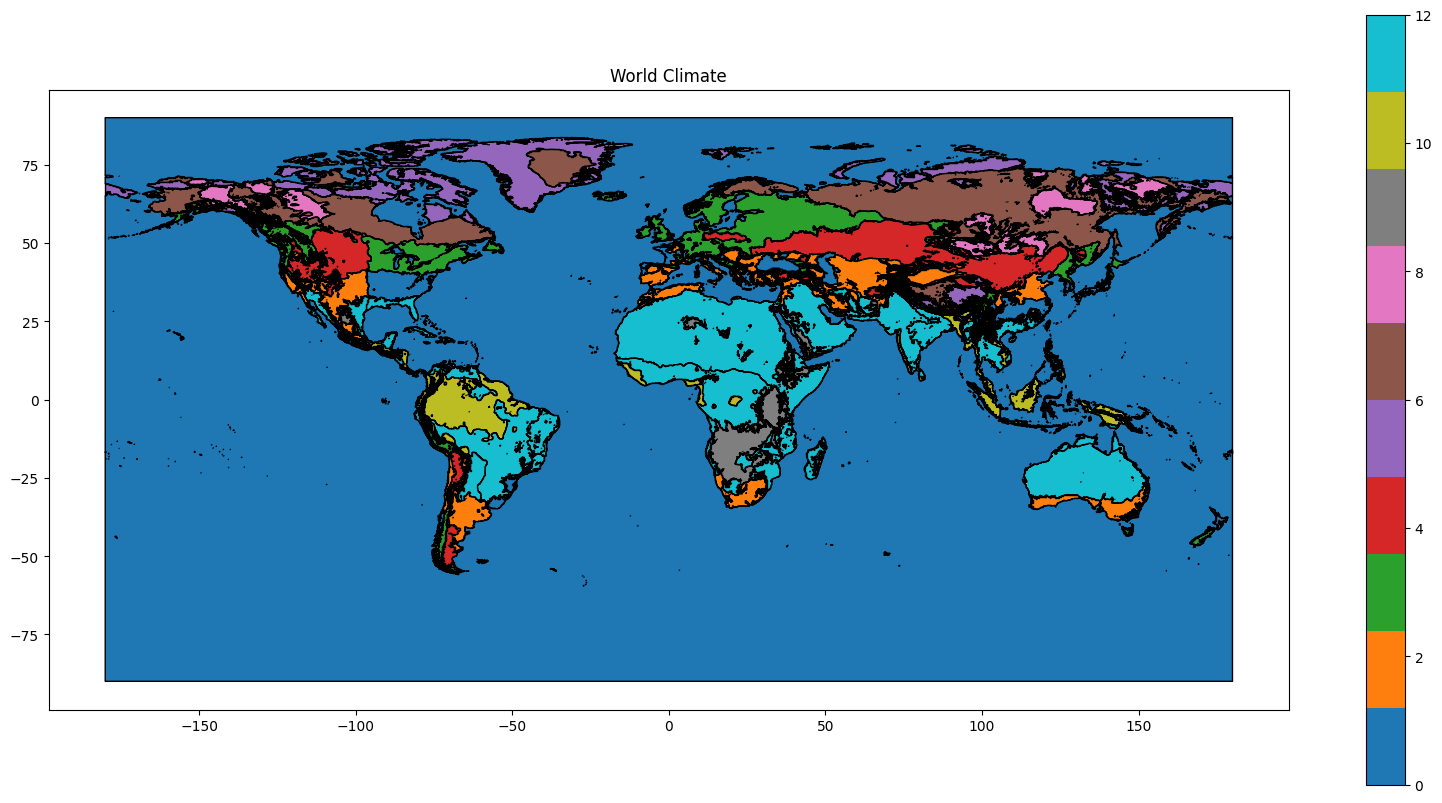

In [82]:

climate.plot(column='CLASS_NAME', edgecolor='black', figsize=(20, 10), cmap='tab10', legend=True)
plt. title("World Climate")
plt.show()

In [45]:
climate_change_past20=get_df(r'2001-2025-B1.geojson')

In [46]:
climate_change_future20=get_df(r'2026-2050-B1.geojson')

In [53]:
climate_change_future100=get_df(r'2076-2100-B1.geojson')

In [48]:
climate_change_future20

,OBJECTID,ID,GRIDCODE,Shape_Length,Shape_Area,geometry
0,1,1.0,62.0,1.874914,0.160097,"POLYGON ((-37.50000 83.50000, -37.75000 84.140..."
1,2,2.0,62.0,7.000000,1.500000,"POLYGON ((-42.50000 83.50000, -42.50000 83.000..."
2,3,3.0,61.0,29.200091,11.224300,"POLYGON ((-79.76406 81.26406, -69.35521 82.152..."
3,4,4.0,62.0,1.886444,0.171167,"POLYGON ((-47.00000 81.50000, -47.60962 81.328..."
4,5,5.0,62.0,3.813575,0.501075,"POLYGON ((91.16119 81.64322, 89.82751 81.21733..."
...,...,...,...,...,...,...
2238,2239,2239.0,61.0,1.886453,0.171169,"POLYGON ((168.32883 -75.89038, 167.89038 -76.3..."
2239,2240,2240.0,61.0,1.886443,0.171167,"POLYGON ((-66.17117 -76.39038, -66.60961 -76.8..."
2240,2241,2241.0,61.0,12.772568,5.843150,"POLYGON ((-159.24962 -79.21156, -163.27292 -78..."
2241,2242,2242.0,61.0,1024.690287,6331.592383,"MULTIPOLYGON (((179.75507 -89.75433, 180.00000..."


In [47]:
climate_change_past20

,OBJECTID,ID,GRIDCODE,Shape_Length,Shape_Area,geometry
0,1,1.0,62.0,1.874914,0.160097,"POLYGON ((-37.50000 83.50000, -37.75000 84.140..."
1,2,2.0,62.0,5.000000,1.000000,"POLYGON ((-46.00000 83.00000, -44.00000 83.000..."
2,3,3.0,62.0,7.000000,1.500000,"POLYGON ((-42.50000 83.50000, -42.50000 83.000..."
3,4,4.0,62.0,1.886444,0.171167,"POLYGON ((-33.67116 82.10961, -34.10962 81.671..."
4,5,5.0,61.0,30.077330,12.002541,"POLYGON ((-79.26406 81.26406, -69.46233 82.183..."
...,...,...,...,...,...,...
2124,2125,2125.0,61.0,1.886453,0.171169,"POLYGON ((168.32883 -75.89038, 167.89038 -76.3..."
2125,2126,2126.0,61.0,1.886443,0.171167,"POLYGON ((-66.17117 -76.39038, -66.60961 -76.8..."
2126,2127,2127.0,61.0,12.772568,5.843150,"POLYGON ((-159.24962 -79.21156, -163.27292 -78..."
2127,2128,2128.0,61.0,1024.690287,6331.592383,"MULTIPOLYGON (((179.75507 -89.75433, 180.00000..."


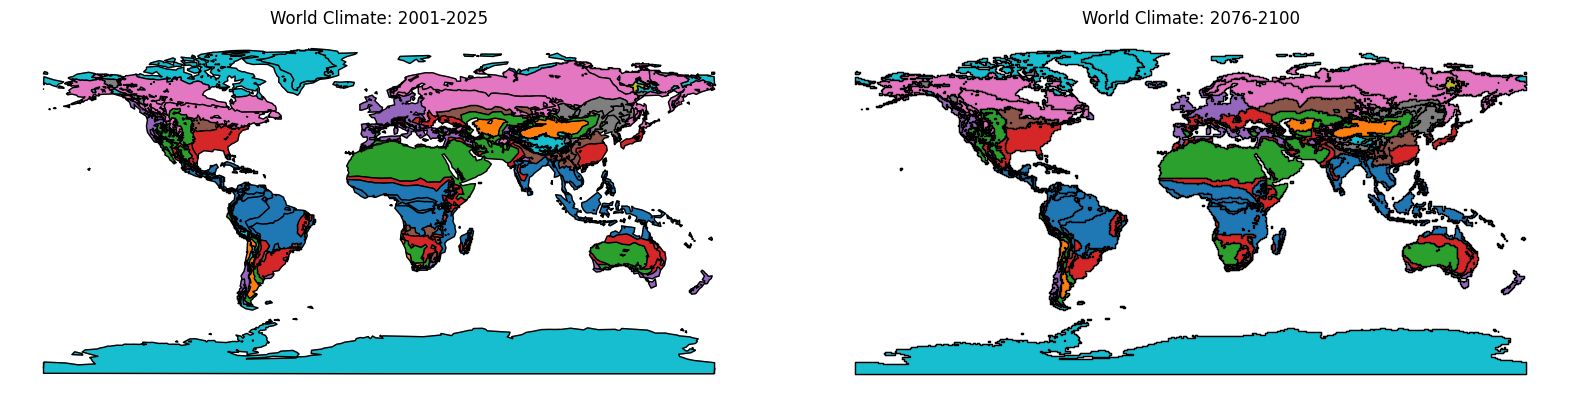

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(20, 25))
plt.subplots_adjust(wspace=0.1) # Adjust the horizontal space between subplots

ax1 = axes[0]
climate_change_past20.plot(ax=ax1, color="palegreen", edgecolor="black", alpha = 0.4)
climate_change_past20.plot(ax=ax1, column='GRIDCODE', edgecolor='black', cmap='tab10')
ax1.set_title("World Climate: 2001-2025")
ax1.axis('off')

ax2 = axes[1]
climate_change_future100.plot(ax=ax2, color="palegreen", edgecolor="black", alpha = 0.4)
climate_change_future100.plot(ax=ax2, column='GRIDCODE', edgecolor='black', cmap='tab10')
ax2.set_title("World Climate: 2076-2100")
ax2.axis('off')

plt.show()
# We can not see the difference with naked eyes in this granularity in the next 50-75 years.

## Olympic National Park Simple Report

Based on the analysis of data regarding the location of Olympic National Park, its ecological zones can be classified as temperate mountain systems. The soil type in the area is predominantly Andosol. As for the climate, it is challenging to determine both the current conditions and the future changes.
